# Genetic Algorithm to reach a certain bit pattern

<b>Author:</b> Arian Gallardo 

<b>Github:</b> [ariangc](https://github.com/ariangc)

Pontifical Catholic University of Peru

<b>Abstract class of an individual entity</b>

In [1]:
class Individual:
    def __init__(self, chromosome):
        self.chromosome = chromosome
    
    def crossover(self, other): #virtual
        raise NotImplementedError
        
    def mutate(self): #virtual
        raise NotImplementedError

<b>Concrete class of an individual entity</b>

In [2]:
import random

class Individual_bitpattern(Individual):
    
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = -1
    
    def crossover_onepoint(self, other):
        c = random.randrange(len(self.chromosome))
        ind1 = Individual_bitpattern(self.chromosome[:c] + other.chromosome[c:])
        ind2 = Individual_bitpattern(other.chromosome[:c] + self.chromosome[c:])
        
        return [ind1,ind2]
    
    def mutate_random(self):
        #"Flip random quantity of bits of the chromosome"
        mutated_ind = Individual_bitpattern(self.chromosome[:])
        n = random.randrange(len(mutated_ind.chromosome))
        for _ in range(n):
            x = random.randrange(len(mutated_ind.chromosome))
            if(mutated_ind.chromosome[x] == '1'):
                mutated_ind.chromosome[x] = '0'
            else:
                mutated_ind.chromosome[x] = '1'
        
        return mutated_ind

<b>Fitness function to evaluate an individual entity</b>

In [3]:
def fitness_bitpattern(chromosome, goal):
    n = len(chromosome)
    fitness = 0
    for i in range(n):
        if(chromosome[i] == goal[i]):
            fitness += 1
                
    return fitness

<b>Function that evaluates all population of individuals</b>

In [4]:
def evaluate_population(population, fitness_fn, goal):
    popsize = len(population)
    for i in range(popsize):
        if population[i].fitness == -1:
            population[i].fitness = fitness_fn(population[i].chromosome, goal)

<b>Tournament selection for two parents</b>

In [5]:
def select_parents_tournament(population):
    #We select randomly 3 individuals and choose the best
    randlist = []
    p1 = -1
    p2 = -1
    
    maxFitness = -1
    
    while (len(randlist) < 3):
        x = random.randrange(len(population))
        if(not(x in randlist)):
            randlist.append(x)
            if(population[x].fitness > maxFitness):
                p1 = x
                maxFitness = population[x].fitness
    
    randlist = []
    maxFitness = -1
    
    while (len(randlist) < 3):
        x = random.randrange(len(population))
        if(not(x in randlist) and x != p1):
            randlist.append(x)
            if(population[x].fitness > maxFitness):
                p2 = x
                maxFitness = population[x].fitness
    
    return [population[p1], population[p2]]

<b> Select survivors for next generation</b>

In [6]:
def select_survivors(population, offspring_population, numsurvivors):
    next_population = []
    population.extend(offspring_population)
    isurvivors = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse = True)[:numsurvivors]
    for i in range(numsurvivors): next_population.append(population[isurvivors[i]])
    return next_population

<b>Genetic Algorithm!</b>

In [7]:
def genetic_algorithm(population, fitness_fn, goal, ngen=100, pmut=0.1):
    popsize = len(population)
    evaluate_population(population, fitness_fn, goal)
    ibest = sorted(range(len(population)), key=lambda i:population[i].fitness, reverse=True)[:1]
    bestfitness = [population[ibest[0]].fitness]
    
    print("Poblacion incial, best_fitness = {}".format(population[ibest[0]].fitness))
    
    for g in range(ngen):
        mating_pool = []
        for i in range(popsize//2): mating_pool.append(select_parents_tournament(population))
        
        offspring_population = []
        
        for i in range(len(mating_pool)):
            offspring_population.extend(mating_pool[i][0].crossover_onepoint(mating_pool[i][1]))
            
        for i in range(len(offspring_population)):
            offspring_population[i] = offspring_population[i].mutate_random()
        
        evaluate_population(offspring_population,fitness_fn, goal)
        
        population = select_survivors(population, offspring_population, popsize)
        
        ibest = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse=True)[:1]
        bestfitness.append(population[ibest[0]].fitness)
        print("Generacion {}, best_fitness = {}".format(g, population[ibest[0]].fitness))
    
    return population[ibest[0]], bestfitness

<b>Creating population</b>

In [8]:
def genetic_search_bitpattern(patternSize, fitness_fn, goal, num_patterns=10, popsize=10, ngen=100, pmut=0.1):
    import random
    population = []
    for i in range(popsize):
        chromosome = []
        for j in range(patternSize):
            u = random.randrange(2)
            if(u == 0):
                chromosome.append('0')
            else:
                chromosome.append('1')
        
        population.append(Individual_bitpattern(chromosome))
    
    return genetic_algorithm(population, fitness_fn, goal, ngen, pmut)
        

<b>Testing Genetic Algorithm</b>

Poblacion incial, best_fitness = 66
Generacion 0, best_fitness = 66
Generacion 1, best_fitness = 66
Generacion 2, best_fitness = 66
Generacion 3, best_fitness = 66
Generacion 4, best_fitness = 66
Generacion 5, best_fitness = 66
Generacion 6, best_fitness = 66
Generacion 7, best_fitness = 66
Generacion 8, best_fitness = 67
Generacion 9, best_fitness = 68
Generacion 10, best_fitness = 68
Generacion 11, best_fitness = 68
Generacion 12, best_fitness = 68
Generacion 13, best_fitness = 68
Generacion 14, best_fitness = 68
Generacion 15, best_fitness = 69
Generacion 16, best_fitness = 69
Generacion 17, best_fitness = 69
Generacion 18, best_fitness = 69
Generacion 19, best_fitness = 69
Generacion 20, best_fitness = 69
Generacion 21, best_fitness = 69
Generacion 22, best_fitness = 69
Generacion 23, best_fitness = 69
Generacion 24, best_fitness = 69
Generacion 25, best_fitness = 69
Generacion 26, best_fitness = 71
Generacion 27, best_fitness = 71
Generacion 28, best_fitness = 71
Generacion 29, be

Generacion 403, best_fitness = 90
Generacion 404, best_fitness = 90
Generacion 405, best_fitness = 90
Generacion 406, best_fitness = 90
Generacion 407, best_fitness = 90
Generacion 408, best_fitness = 90
Generacion 409, best_fitness = 90
Generacion 410, best_fitness = 90
Generacion 411, best_fitness = 90
Generacion 412, best_fitness = 90
Generacion 413, best_fitness = 90
Generacion 414, best_fitness = 90
Generacion 415, best_fitness = 90
Generacion 416, best_fitness = 90
Generacion 417, best_fitness = 90
Generacion 418, best_fitness = 90
Generacion 419, best_fitness = 90
Generacion 420, best_fitness = 90
Generacion 421, best_fitness = 90
Generacion 422, best_fitness = 90
Generacion 423, best_fitness = 90
Generacion 424, best_fitness = 90
Generacion 425, best_fitness = 90
Generacion 426, best_fitness = 90
Generacion 427, best_fitness = 90
Generacion 428, best_fitness = 90
Generacion 429, best_fitness = 90
Generacion 430, best_fitness = 90
Generacion 431, best_fitness = 90
Generacion 432

Generacion 654, best_fitness = 93
Generacion 655, best_fitness = 93
Generacion 656, best_fitness = 93
Generacion 657, best_fitness = 93
Generacion 658, best_fitness = 93
Generacion 659, best_fitness = 93
Generacion 660, best_fitness = 93
Generacion 661, best_fitness = 93
Generacion 662, best_fitness = 93
Generacion 663, best_fitness = 93
Generacion 664, best_fitness = 93
Generacion 665, best_fitness = 93
Generacion 666, best_fitness = 93
Generacion 667, best_fitness = 93
Generacion 668, best_fitness = 93
Generacion 669, best_fitness = 93
Generacion 670, best_fitness = 93
Generacion 671, best_fitness = 93
Generacion 672, best_fitness = 93
Generacion 673, best_fitness = 93
Generacion 674, best_fitness = 93
Generacion 675, best_fitness = 93
Generacion 676, best_fitness = 93
Generacion 677, best_fitness = 93
Generacion 678, best_fitness = 93
Generacion 679, best_fitness = 93
Generacion 680, best_fitness = 93
Generacion 681, best_fitness = 93
Generacion 682, best_fitness = 93
Generacion 683

Generacion 962, best_fitness = 95
Generacion 963, best_fitness = 95
Generacion 964, best_fitness = 95
Generacion 965, best_fitness = 95
Generacion 966, best_fitness = 95
Generacion 967, best_fitness = 95
Generacion 968, best_fitness = 95
Generacion 969, best_fitness = 95
Generacion 970, best_fitness = 95
Generacion 971, best_fitness = 95
Generacion 972, best_fitness = 95
Generacion 973, best_fitness = 95
Generacion 974, best_fitness = 95
Generacion 975, best_fitness = 95
Generacion 976, best_fitness = 95
Generacion 977, best_fitness = 95
Generacion 978, best_fitness = 95
Generacion 979, best_fitness = 95
Generacion 980, best_fitness = 95
Generacion 981, best_fitness = 95
Generacion 982, best_fitness = 95
Generacion 983, best_fitness = 95
Generacion 984, best_fitness = 95
Generacion 985, best_fitness = 95
Generacion 986, best_fitness = 95
Generacion 987, best_fitness = 95
Generacion 988, best_fitness = 95
Generacion 989, best_fitness = 95
Generacion 990, best_fitness = 95
Generacion 991

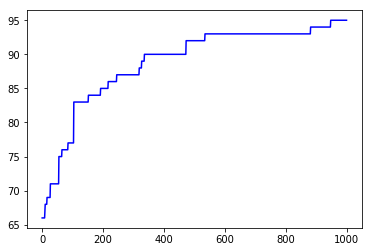

In [13]:
import matplotlib.pyplot as plt

patternSize = 100 #fixed
goal = []
for i in range(patternSize):
    u = random.randrange(2)
    if(u == 0):
        goal.append('0')
    else:
        goal.append('1')


best_ind, bestfitness = genetic_search_bitpattern(patternSize, fitness_bitpattern, goal, 10, 10, 1000, 1)
plt.plot(bestfitness, "b")
plt.show()